## Problem 1 : Clustering using GrLivArea and GarageArea 
Import the complete dataset “train.csv” in Jupyter, as  houseData = pd.read_csv('train.csv')  
 
    a) Extract the two variables in consideration from the dataset    
    
    X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])  
    
    b) Visualize the 2D distribution of the two variables extracted above, using a standard scatter plot.  
    
    c) Import k-Means Clustering model from Scikit-Learn : from sklearn.cluster import KMeans  
    
    d) Guess the number of clusters from the 2D scatterplot, and perform k-Means clustering with that.  
    
    e) Print the cluster centers, view their countplot, and visualize the clusters on the 2D scatterplot.  


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
houseData = pd.read_csv('train.csv')

### a) Extract the two variables in consideration from the dataset    
###    X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])  

In [3]:
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])

### b) Visualize the 2D distribution of the two variables extracted above, using a standard scatter plot.  

<AxesSubplot:xlabel='GrLivArea', ylabel='GarageArea'>

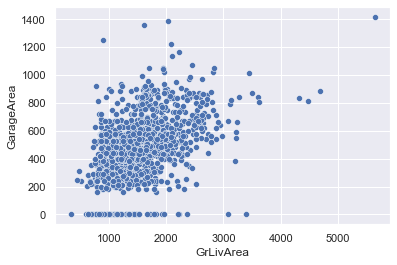

In [4]:
sb.scatterplot(data = X, x = 'GrLivArea', y = 'GarageArea')

### c) Import k-Means Clustering model from Scikit-Learn : from sklearn.cluster import KMeans  

In [5]:
from sklearn.cluster import KMeans

### d) Guess the number of clusters from the 2D scatterplot, and perform k-Means clustering with that.  

In [7]:
num_clust = 3
kmeans = KMeans(n_clusters = num_clust)
kmeans.fit(X)

KMeans(n_clusters=3)

### e) Print the cluster centers, view their countplot, and visualize the clusters on the 2D scatterplot.  

In [11]:
# Print the Cluster Centers
print("Features", "\tGrLivArea", "\tGarageArea")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features 	GrLivArea 	GarageArea

Cluster 0:	1692.46	523.84	
Cluster 1:	1085.43	374.58	
Cluster 2:	2560.19	669.8	


c:\Users\Magiccofee\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='count'>

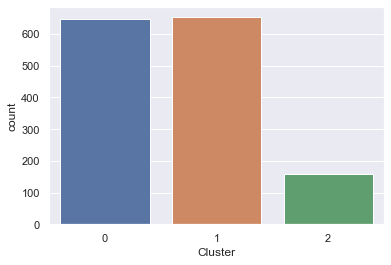

In [18]:
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)
sb.countplot(X_labeled["Cluster"])

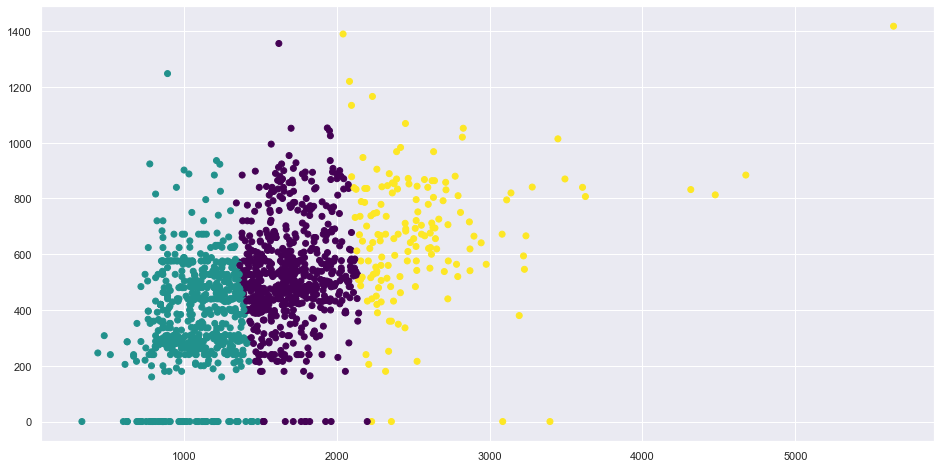

In [19]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

## Problem 2 : Anomaly Detection with the same Variables 
Import the complete dataset “train.csv” in Jupyter, as  houseData = pd.read_csv('train.csv')  
 
    a) Extract the two variables in consideration from the dataset  
 
    X = pd.DataFrame(houseData[['GrLivArea','GarageArea']]) 
 
    b) Visualize the 2D distribution of the two variables extracted above, using a standard scatter plot. 
    
    c) Import Anomaly model from Scikit-Learn : from sklearn.neighbors import LocalOutlierFactor 
    
    d) Guess the parameters from the 2D scatterplot, and perform Anomaly Detection with those parameters. 
    
    e) View their countplot of Anomalies vs Normal Data, and visualize the anomalies on the 2D scatterplot.

In [21]:
houseData = pd.read_csv('train.csv')

### a) Extract the two variables in consideration from the dataset  
 
###    X = pd.DataFrame(houseData[['GrLivArea','GarageArea']]) 
 

In [22]:
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])

### b) Visualize the 2D distribution of the two variables extracted above, using a standard scatter plot. 

<AxesSubplot:xlabel='GrLivArea', ylabel='GarageArea'>

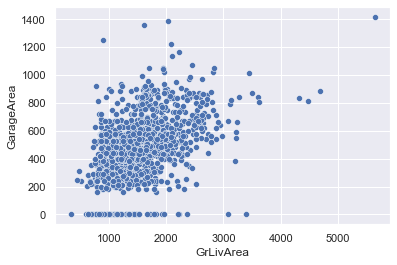

In [23]:
sb.scatterplot(data = X, x = "GrLivArea", y = "GarageArea")

### c) Import Anomaly model from Scikit-Learn : from sklearn.neighbors import LocalOutlierFactor 

In [24]:
from sklearn.neighbors import LocalOutlierFactor

### d) Guess the parameters from the 2D scatterplot, and perform Anomaly Detection with those parameters. 
    

In [39]:
num_neighbors = 40      # Number of Neighbors
cont_fraction = 0.10    # Fraction of Anomalies

lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = 'cont_fraction')

lof.fit(X)

LocalOutlierFactor(n_neighbors=40)

### e) View their countplot of Anomalies vs Normal Data, and visualize the anomalies on the 2D scatterplot.

c:\Users\Magiccofee\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Anomaly', ylabel='count'>

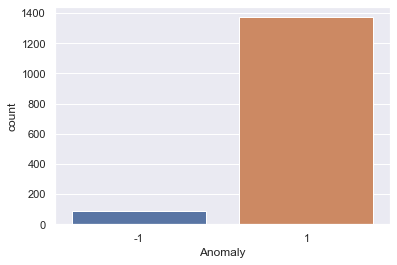

In [40]:
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

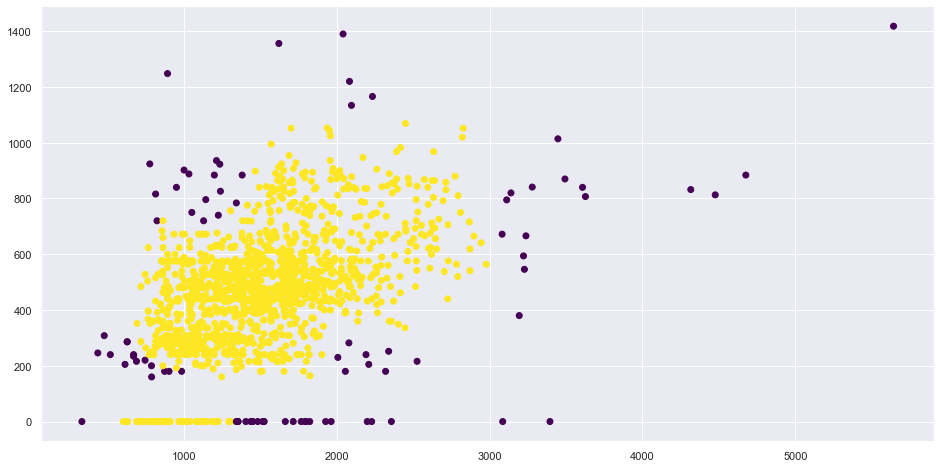

In [41]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Anomaly", cmap = 'viridis', data = X_labeled)